In [1]:
from pyiron import Project
import numpy as np
import matplotlib.pylab as plt

In [2]:
pr = Project('bm_bccFe')

In [32]:
from pyscal3 import System

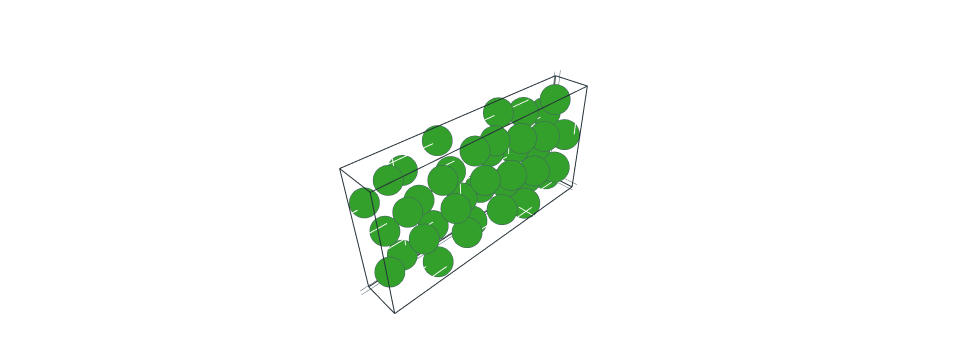

In [33]:
sys = System.create.defect.grain_boundary(axis=[0,0,1], 
                        sigma=5, 
                        gb_plane=[3, -1, 0],
                        element='Fe')
sys.show.all()

In [4]:
job_opt = pr.create.job.Lammps('optimizaiton')
job_opt.structure = pr.create.structure.ase.bulk("Fe", crystalstructure='bcc', cubic=True)
job_opt.potential = job_opt.list_potentials()[0]
job_opt.calc_minimize(pressure = 0.0)
job_opt.run(delete_existing_job=True)

The job optimizaiton was saved and received the ID: 9476


In [6]:
job_opt.calc_minimize?

Signature:
job_opt.calc_minimize(
    ionic_energy_tolerance=0.0,
    ionic_force_tolerance=0.0001,
    e_tol=None,
    f_tol=None,
    max_iter=100000,
    pressure=None,
    n_print=100,
    style='cg',
)
Docstring:
Sets parameters required for minimization.

Args:
    ionic_energy_tolerance (float): If the magnitude of difference between energies of two consecutive steps is
        lower than or equal to `ionic_energy_tolerance`, the minimisation terminates. (Default is 0.0 eV.)
    ionic_force_tolerance (float): If the magnitude of the global force vector at a step is lower than or equal
        to `ionic_force_tolerance`, the minimisation terminates. (Default is 1e-4 eV/angstrom.)
    e_tol (float): Same as ionic_energy_tolerance (deprecated)
    f_tol (float): Same as ionic_force_tolerance (deprecated)
    max_iter (int): Maximum number of minimisation steps to carry out. If the minimisation converges before
        `max_iter` steps, terminate at the converged step. If the minimi

In [35]:
opt_str = job_opt.get_structure(-1)

In [36]:
ref_job = pr.create.job.Lammps('bm_Fe', delete_existing_job=True)

In [37]:
ref_job.structure = opt_str
ref_job.potential = ref_job.list_potentials()[0]

murn = ref_job.create_job("Murnaghan", "FeMurn", delete_existing_job=True)
murn.run(delete_existing_job=True)
murn.fit_birch_murnaghan()

The job FeMurn was saved and received the ID: 8216
The job FeMurn_0_9 was saved and received the ID: 8217
The job FeMurn_0_92 was saved and received the ID: 8218
The job FeMurn_0_94 was saved and received the ID: 8219
The job FeMurn_0_96 was saved and received the ID: 8220
The job FeMurn_0_98 was saved and received the ID: 8221
The job FeMurn_1_0 was saved and received the ID: 8222
The job FeMurn_1_02 was saved and received the ID: 8223
The job FeMurn_1_04 was saved and received the ID: 8224
The job FeMurn_1_06 was saved and received the ID: 8225
The job FeMurn_1_08 was saved and received the ID: 8226
The job FeMurn_1_1 was saved and received the ID: 8227


{'fit_type': 'birchmurnaghan',
 'volume_eq': 23.551473397230783,
 'energy_eq': -8.632560230122875,
 'bulkmodul_eq': 188.9110341394213,
 'b_prime_eq': 4.717644320185373,
 'least_square_error': array([2.31270049e-04, 5.95782770e-01, 1.67092321e-01, 4.94257839e-03]),
 'volume': array([21.19816888, 21.6692393 , 22.14030972, 22.61138014, 23.08245056,
        23.55352098, 24.0245914 , 24.49566182, 24.96673223, 25.43780265,
        25.90887307]),
 'energy': array([-8.46276154, -8.52897698, -8.57691662, -8.60874972, -8.62648541,
        -8.6320001 , -8.62689822, -8.6120795 , -8.58823965, -8.55603123,
        -8.51606704])}

In [41]:
pr = Project('bm_bccFe')

In [42]:
ref_job = pr.create.job.Lammps('bm_Fe', delete_existing_job=True)

In [43]:
ref_job.structure = pr.create.structure.ase.bulk("Fe", crystalstructure='bcc', cubic=True).repeat([4,4,4])
ref_job.potential = ref_job.list_potentials()[0]

murn = ref_job.create_job("Murnaghan", "FeMurn", delete_existing_job=True)
murn.run(delete_existing_job=True)
murn.fit_birch_murnaghan()

The job FeMurn was saved and received the ID: 8216
The job FeMurn_0_9 was saved and received the ID: 8217
The job FeMurn_0_92 was saved and received the ID: 8218
The job FeMurn_0_94 was saved and received the ID: 8219
The job FeMurn_0_96 was saved and received the ID: 8220
The job FeMurn_0_98 was saved and received the ID: 8221
The job FeMurn_1_0 was saved and received the ID: 8222
The job FeMurn_1_02 was saved and received the ID: 8223
The job FeMurn_1_04 was saved and received the ID: 8224
The job FeMurn_1_06 was saved and received the ID: 8225
The job FeMurn_1_08 was saved and received the ID: 8226
The job FeMurn_1_1 was saved and received the ID: 8227


{'fit_type': 'birchmurnaghan',
 'volume_eq': 1507.4221704135277,
 'energy_eq': -552.485127171933,
 'bulkmodul_eq': 189.02207210251296,
 'b_prime_eq': 4.613942266032932,
 'least_square_error': array([0.0150671 , 0.59419754, 0.17280552, 0.33062962]),
 'volume': array([1361.65841273, 1391.91748839, 1422.17656447, 1452.43564024,
        1482.69471601, 1512.953792  , 1543.21286764, 1573.47194345,
        1603.73101941, 1633.99009516, 1664.24917108]),
 'energy': array([-542.40289734, -546.4502235 , -549.34365809, -551.22172667,
        -552.21277557, -552.43680634, -551.98999812, -550.92535166,
        -549.28734001, -547.11767633, -544.45553164])}

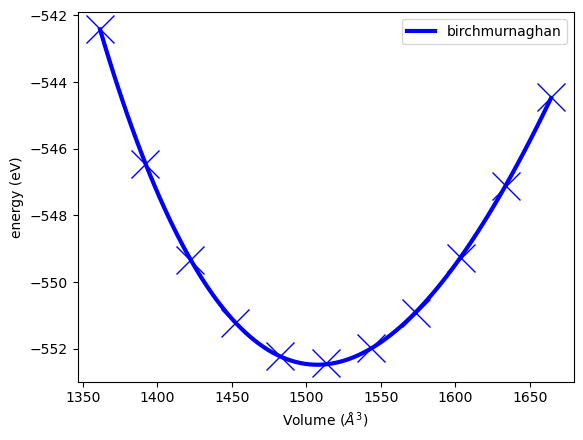

<Axes: xlabel='Volume ($\\AA^3$)', ylabel='energy (eV)'>

In [52]:
murn.plot()

In [22]:
# plt.savefig('my_figure.png')

# plt.figure()
# figure = plt.plot(c_H, BM)
# plt.xlabel("Hydrogen concentration")
# plt.ylabel("Bulk modulus")
# plt.savefig('BM.png')
# plt.close()

<Figure size 640x480 with 0 Axes>

In [263]:
# job_opt = pr.create.job.Lammps('optimization')
# job_opt.structure = bulk_sc
# job_opt.potential = job_opt.list_potentials()[0]
# job_opt.calc_minimize(n_print=10, pressure=0.0)
# job_opt.run(delete_existing_job=True)
# structure_opted = job_opt.get_structure(frame=-1)

Fe with one H vacancies

In [329]:
# bulk_sc_1vacancis = bulk_sc.copy()
# print(len(bulk_sc_1vacancis))
# del bulk_sc_1vacancis[np.random.randint(len(bulk_sc_1vacancis))]
# print(len(bulk_sc_1vacancis))
# bulk_sc_1vacancis.plot3d()

In [357]:
bulk_sc_1vacancis = bulk_sc.copy()
bulk_sc_1vacancis[np.random.randint(len(bulk_sc_1vacancis))] = 'H'
bulk_sc_1vacancis.plot3d()

NGLWidget()

In [363]:
# structure relaxation
job_opt = pr.create.job.Lammps('optimization', delete_existing_job=True)
job_opt.structure = bulk_sc_1vacancis
job_opt.potential = job_opt.list_potentials()[1]
job_opt.calc_minimize(n_print=10, pressure=0.0)
job_opt.run(delete_existing_job=True)
structure_opted = job_opt.get_structure(frame=-1)
job_opt.animate_structures()

The job optimization was saved and received the ID: 115


NGLWidget(max_frame=22)

In [366]:
# BM BY Murnaghan
job_1vancancie = pr.create.job.Lammps('bm_Fe_1vacancies', delete_existing_job=True)
job_1vancancie.structure = structure_opted
job_1vancancie.potential = job_1vancancie.list_potentials()[1]
murn1 = job_1vancancie.create_job("Murnaghan", "FeMurn1")
murn1.run(delete_existing_job=True)
murn1.fit_birch_murnaghan()

The job FeMurn1 was saved and received the ID: 116
The job FeMurn1_0_9 was saved and received the ID: 117
The job FeMurn1_0_92 was saved and received the ID: 118
The job FeMurn1_0_94 was saved and received the ID: 119
The job FeMurn1_0_96 was saved and received the ID: 120
The job FeMurn1_0_98 was saved and received the ID: 121
The job FeMurn1_1_0 was saved and received the ID: 122
The job FeMurn1_1_02 was saved and received the ID: 123
The job FeMurn1_1_04 was saved and received the ID: 124
The job FeMurn1_1_06 was saved and received the ID: 125
The job FeMurn1_1_08 was saved and received the ID: 126
The job FeMurn1_1_1 was saved and received the ID: 127


{'fit_type': 'birchmurnaghan',
 'volume_eq': 1506.0423046814922,
 'energy_eq': -546.2792068719419,
 'bulkmodul_eq': 186.86579060755548,
 'b_prime_eq': 4.610210331940922,
 'least_square_error': array([0.01479726, 0.58403608, 0.17246593, 0.33011989]),
 'volume': array([1361.65841273, 1391.91748839, 1422.17656447, 1452.43564024,
        1482.69471601, 1512.953792  , 1543.21286764, 1573.47194345,
        1603.73101941, 1633.99009516, 1664.24917108]),
 'energy': array([-536.50846824, -540.46058982, -543.27675597, -545.09334503,
        -546.03671401, -546.22500454, -545.75290715, -544.67260782,
        -543.02789738, -540.85984929, -538.20703402])}

In [367]:
# job_1vancancie = pr.create.job.Lammps('bm_Fe_1vacancies', delete_existing_job=True)
# job_1vancancie.structure = structure_opted
# job_1vancancie.potential = potential
# murn1 = job_1vancancie.create_job("Murnaghan", "FeMurn1")
# murn1.run(delete_existing_job=True)
# murn1.fit_birch_murnaghan()
# murn1.plot()

Fe with two H

In [379]:
bulk_2vacancies = bulk_sc.copy()
N_H = 2
bulk_2vacancies[np.random.permutation(len(bulk_2vacancies))[:N_H]] = 'H'
bulk_2vacancies.plot3d()

NGLWidget()

In [380]:
# structure relaxation
job_opt = pr.create.job.Lammps('optimization', delete_existing_job=True)
job_opt.structure = bulk_2vacancies
job_opt.potential = job_opt.list_potentials()[1]
job_opt.calc_minimize(n_print=10, pressure=0.0)
job_opt.run(delete_existing_job=True)
structure_opted = job_opt.get_structure(frame=-1)
job_opt.animate_structures()

The job optimization was saved and received the ID: 128


NGLWidget(max_frame=155)

In [383]:
# BM WITH Murnaghan
job_2vancancie = pr.create.job.Lammps('bm_Fe_1vacancies', delete_existing_job=True)
job_2vancancie.structure = structure_opted
job_2vancancie.potential = job_2vancancie.list_potentials()[1]
murn2 = job_1vancancie.create_job("Murnaghan", "FeMurn2", delete_existing_job=True)
murn2.run(delete_existing_job=True)
murn2.fit_birch_murnaghan()

The job FeMurn2 was saved and received the ID: 141
The job FeMurn2_0_9 was saved and received the ID: 142
The job FeMurn2_0_92 was saved and received the ID: 143
The job FeMurn2_0_94 was saved and received the ID: 144
The job FeMurn2_0_96 was saved and received the ID: 145
The job FeMurn2_0_98 was saved and received the ID: 146
The job FeMurn2_1_0 was saved and received the ID: 147
The job FeMurn2_1_02 was saved and received the ID: 148
The job FeMurn2_1_04 was saved and received the ID: 149
The job FeMurn2_1_06 was saved and received the ID: 150
The job FeMurn2_1_08 was saved and received the ID: 151
The job FeMurn2_1_1 was saved and received the ID: 152


{'fit_type': 'birchmurnaghan',
 'volume_eq': 1484.846400318569,
 'energy_eq': -510.24389895956386,
 'bulkmodul_eq': 171.9412281430917,
 'b_prime_eq': 3.1661305209691886,
 'least_square_error': array([0.01093332, 0.45327841, 0.13571108, 0.25855383]),
 'volume': array([1336.39272064, 1366.09033675, 1395.78795276, 1425.48556871,
        1455.18318462, 1484.88080065, 1514.57841662, 1544.2760326 ,
        1573.97364876, 1603.67126475, 1633.36888086]),
 'energy': array([-501.05999022, -504.51306276, -507.10370179, -508.89256525,
        -509.93100875, -510.26580879, -509.94850973, -509.03122814,
        -507.57200324, -505.639199  , -503.29846785])}

In [23]:
bulk_vacancies = bulk_sc.copy()
bulk_vacancies[5] = 'H'
bulk_vacancies


Fe: [0. 0. 0.]
Fe: [1.435 1.435 1.435]
Fe: [0.   0.   2.87]
Fe: [1.435 1.435 4.305]
Fe: [0.   0.   5.74]
H: [1.435 1.435 7.175]
Fe: [0.   2.87 0.  ]
Fe: [1.435 4.305 1.435]
Fe: [0.   2.87 2.87]
Fe: [1.435 4.305 4.305]
Fe: [0.   2.87 5.74]
Fe: [1.435 4.305 7.175]
Fe: [0.   5.74 0.  ]
Fe: [1.435 7.175 1.435]
Fe: [0.   5.74 2.87]
Fe: [1.435 7.175 4.305]
Fe: [0.   5.74 5.74]
Fe: [1.435 7.175 7.175]
Fe: [2.87 0.   0.  ]
Fe: [4.305 1.435 1.435]
Fe: [2.87 0.   2.87]
Fe: [4.305 1.435 4.305]
Fe: [2.87 0.   5.74]
Fe: [4.305 1.435 7.175]
Fe: [2.87 2.87 0.  ]
Fe: [4.305 4.305 1.435]
Fe: [2.87 2.87 2.87]
Fe: [4.305 4.305 4.305]
Fe: [2.87 2.87 5.74]
Fe: [4.305 4.305 7.175]
Fe: [2.87 5.74 0.  ]
Fe: [4.305 7.175 1.435]
Fe: [2.87 5.74 2.87]
Fe: [4.305 7.175 4.305]
Fe: [2.87 5.74 5.74]
Fe: [4.305 7.175 7.175]
Fe: [5.74 0.   0.  ]
Fe: [7.175 1.435 1.435]
Fe: [5.74 0.   2.87]
Fe: [7.175 1.435 4.305]
Fe: [5.74 0.   5.74]
Fe: [7.175 1.435 7.175]
Fe: [5.74 2.87 0.  ]
Fe: [7.175 4.305 1.435]
Fe: [5.74 2.87 2.

In [27]:
bulk_vacancies[4] = 'H'
bulk_vacancies

Fe: [0. 0. 0.]
Fe: [1.435 1.435 1.435]
Fe: [0.   0.   2.87]
Fe: [1.435 1.435 4.305]
H: [0.   0.   5.74]
H: [1.435 1.435 7.175]
Fe: [0.   2.87 0.  ]
H: [1.435 4.305 1.435]
Fe: [0.   2.87 2.87]
Fe: [1.435 4.305 4.305]
Fe: [0.   2.87 5.74]
Fe: [1.435 4.305 7.175]
Fe: [0.   5.74 0.  ]
Fe: [1.435 7.175 1.435]
Fe: [0.   5.74 2.87]
Fe: [1.435 7.175 4.305]
Fe: [0.   5.74 5.74]
Fe: [1.435 7.175 7.175]
Fe: [2.87 0.   0.  ]
Fe: [4.305 1.435 1.435]
Fe: [2.87 0.   2.87]
Fe: [4.305 1.435 4.305]
Fe: [2.87 0.   5.74]
Fe: [4.305 1.435 7.175]
Fe: [2.87 2.87 0.  ]
Fe: [4.305 4.305 1.435]
Fe: [2.87 2.87 2.87]
Fe: [4.305 4.305 4.305]
Fe: [2.87 2.87 5.74]
Fe: [4.305 4.305 7.175]
Fe: [2.87 5.74 0.  ]
Fe: [4.305 7.175 1.435]
Fe: [2.87 5.74 2.87]
Fe: [4.305 7.175 4.305]
Fe: [2.87 5.74 5.74]
Fe: [4.305 7.175 7.175]
Fe: [5.74 0.   0.  ]
Fe: [7.175 1.435 1.435]
Fe: [5.74 0.   2.87]
Fe: [7.175 1.435 4.305]
Fe: [5.74 0.   5.74]
Fe: [7.175 1.435 7.175]
Fe: [5.74 2.87 0.  ]
Fe: [7.175 4.305 1.435]
Fe: [5.74 2.87 2.87

Fe with n H

In [1]:
from pyiron import Project
import numpy as np
import matplotlib.pylab as plt

In [28]:
pr = Project('Fe_vacancies')
bulk_sc = pr.create.structure.bulk('Fe', crystalstructure='bcc', cubic=True).repeat([3,3,3])
c_H = []
BM = []

for i in range(len(bulk_sc)):
    
    bulk_vacancies = bulk_sc.copy()
    bulk_vacancies[np.random.permutation(len(bulk_vacancies))[:i]]= 'H'
    
    job_opt = pr.create.job.Lammps(f'optimization{i}', delete_existing_job=True)
    job_opt.structure = bulk_vacancies
    job_opt.potential = job_opt.list_potentials()[0]
    job_opt.calc_minimize(n_print=10, pressure=0.0)
    job_opt.run(delete_existing_job=True)
    structure_opted = job_opt.get_structure(frame=-1)
    
    job_vancancies = pr.create.job.Lammps(f'bm_Fe_{i}vacancies', delete_existing_job=True)
    job_vancancies.structure = structure_opted
    job_vancancies.potential = job_vancancies.list_potentials()[0]
    murn = job_vancancies.create_job('Murnaghan', f"FeMurn{i}", delete_existing_job=True)
    murn.run(delete_existing_job=True)
    
    bm = murn.fit_birch_murnaghan()['bulkmodul_eq']
    BM.append(bm)
    c = i/len(bulk_sc)
    c_H.append(c)
    
    

The job optimization0 was saved and received the ID: 1884
The job FeMurn0 was saved and received the ID: 1885
The job FeMurn0_0_9 was saved and received the ID: 1886
The job FeMurn0_0_92 was saved and received the ID: 1887
The job FeMurn0_0_94 was saved and received the ID: 1888
The job FeMurn0_0_96 was saved and received the ID: 1889
The job FeMurn0_0_98 was saved and received the ID: 1890
The job FeMurn0_1_0 was saved and received the ID: 1891
The job FeMurn0_1_02 was saved and received the ID: 1892
The job FeMurn0_1_04 was saved and received the ID: 1893
The job FeMurn0_1_06 was saved and received the ID: 1894
The job FeMurn0_1_08 was saved and received the ID: 1895
The job FeMurn0_1_1 was saved and received the ID: 1896
The job optimization1 was saved and received the ID: 1897
The job FeMurn1 was saved and received the ID: 1898
The job FeMurn1_0_9 was saved and received the ID: 1899
The job FeMurn1_0_92 was saved and received the ID: 1900
The job FeMurn1_0_94 was saved and received

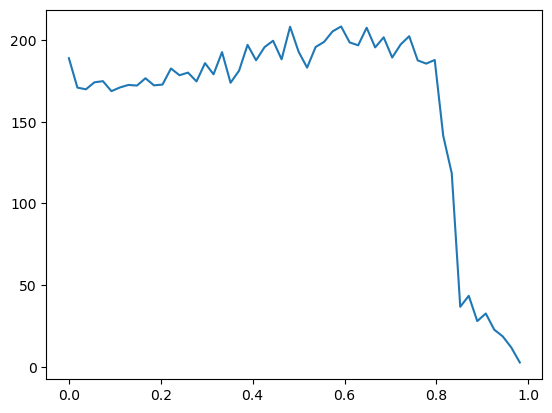

In [29]:
plt.plot(c_H, BM)

In [30]:
BM

[188.911034139532,
 170.9036811828114,
 169.8638040384993,
 174.1476203878351,
 174.8508753482144,
 168.74144192870997,
 170.9973736034364,
 172.54010942968955,
 172.16010009491066,
 176.6240628963411,
 172.28955793635947,
 172.76575191622678,
 182.60119636211843,
 178.4789515118539,
 180.08300886955678,
 174.70108119361058,
 185.8707362730347,
 179.04238542341523,
 192.6149038481741,
 173.87162520883038,
 181.24296152960673,
 197.08420969471678,
 187.64426439663765,
 195.68819568761336,
 199.5992917038836,
 188.21648821464512,
 208.1599889668073,
 192.86799308475213,
 183.13881301295046,
 195.75137614779152,
 198.9153869629483,
 205.3412751361723,
 208.32359892034765,
 198.5649868760567,
 196.80710616871568,
 207.5631916132965,
 195.52159736050035,
 201.69261741453306,
 189.302405641918,
 197.356760720323,
 202.3611042335076,
 187.56194672799202,
 185.58947099032136,
 187.82115103091064,
 141.38085417884034,
 118.50201401450892,
 36.75079847639628,
 43.4653975615806,
 27.9957203359335

In [285]:
job_1vancancie = pr.create.job.Lammps('bm_Fe_1vacancies', delete_existing_job=True)
job_1vancancie.structure = job_opt.get_structure(frame=-1)
job_1vancancie.potential = potential
murn1 = job_1vancancie.create_job("Murnaghan", "FeMurn1")
murn1.run(delete_existing_job=True)
murn1.fit_birch_murnaghan()
# murn1.plot()

The job FeMurn1 was saved and received the ID: 77
The job FeMurn1_0_9 was saved and received the ID: 78
The job FeMurn1_0_92 was saved and received the ID: 79
The job FeMurn1_0_94 was saved and received the ID: 80
The job FeMurn1_0_96 was saved and received the ID: 81
The job FeMurn1_0_98 was saved and received the ID: 82
The job FeMurn1_1_0 was saved and received the ID: 83
The job FeMurn1_1_02 was saved and received the ID: 84
The job FeMurn1_1_04 was saved and received the ID: 85
The job FeMurn1_1_06 was saved and received the ID: 86
The job FeMurn1_1_08 was saved and received the ID: 87
The job FeMurn1_1_1 was saved and received the ID: 88


{'fit_type': 'birchmurnaghan',
 'volume_eq': 1506.0423046814922,
 'energy_eq': -546.2792068719419,
 'bulkmodul_eq': 186.86579060755548,
 'b_prime_eq': 4.610210331940922,
 'least_square_error': array([0.01479726, 0.58403608, 0.17246593, 0.33011989]),
 'volume': array([1361.65841273, 1391.91748839, 1422.17656447, 1452.43564024,
        1482.69471601, 1512.953792  , 1543.21286764, 1573.47194345,
        1603.73101941, 1633.99009516, 1664.24917108]),
 'energy': array([-536.50846824, -540.46058982, -543.27675597, -545.09334503,
        -546.03671401, -546.22500454, -545.75290715, -544.67260782,
        -543.02789738, -540.85984929, -538.20703402])}

In [313]:
structureAl = pr.create.structure.bulk('Al', cubic=True)
structureAl = structureAl.repeat([4,4,4])
n_sub = 24
structureAl[np.random.permutation(len(structureAl))[:n_sub]] = 'H'
print('Number of atoms in the repeat unit: ',structure.get_number_of_atoms())
print('Chemical formula: ',structure.get_chemical_formula())
structureAl.plot3d()


Number of atoms in the repeat unit:  256
Chemical formula:  Al232Mg24


NGLWidget()

In [319]:
job_minin = pr.create.job.Lammps('AlH', delete_existing_job=True)
job_minin.structure = structureAl
job_minin.potential = job_minin.list_potentials()[1]
job_minin.calc_minimize(n_print=10, pressure=[0,0,0,0,0,0])
job_minin.run(delete_existing_job=True)

The job AlH was saved and received the ID: 102


In [320]:
job_minin.animate_structures()

NGLWidget(max_frame=1460)

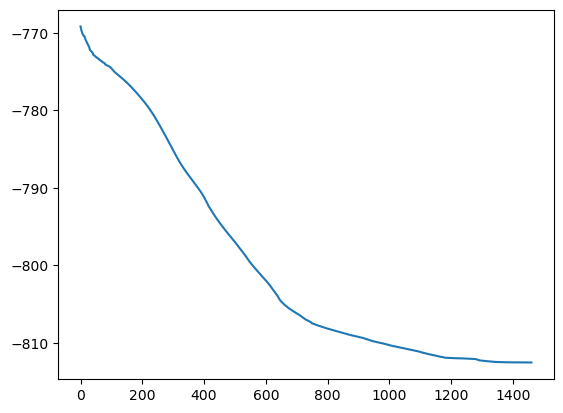

In [321]:
plt.plot(job_minin.output.energy_tot)

In [316]:
job_minin.list_potentials()[1]

['1995--Angelo-J-E--Ni-Al-H--LAMMPS--ipr1',
 '2011--Ko-W-S--Al-H--LAMMPS--ipr1',
 '2013--Shim-J-H--V-Al-H--LAMMPS--ipr1',
 '2018--Zhou-X-W--Al-Cu-H--LAMMPS--ipr1',
 'EAM_Dynamo_AngeloMoodyBaskes_1995_NiAlH__MO_418978237058_005',
 'MEAM_LAMMPS_KoShimLee_2011_AlH__MO_127847080751_000',
 'MEAM_LAMMPS_ShimKoKim_2013_AlVH__MO_344724145339_000']

In [299]:
print('Number of atoms in the repeat unit: ',structure.get_number_of_atoms())
print('Chemical formula: ',structure.get_chemical_formula())
structure.plot3d(

array([ 50, 120, 226, 255,  57, 149, 234,  15, 101, 146,   0,  46, 223,
       242, 161,  66, 231, 163, 139,  94, 204, 169,  44, 212,  76,  14,
       198, 187,  12, 129, 232, 233, 211, 207,  19, 230,   6,  56,  78,
        21, 213,  95, 105, 209, 132,  18, 104,  75,  64, 243, 254, 175,
       167, 188,  27,  65,  13, 236, 112,  24,   7, 246, 190,  84,  80,
         3,  39,  67, 164, 130, 219,  87, 123, 248,   1,  97,  40, 102,
       114, 113, 147, 156, 100, 228, 155, 176, 251,  63, 168, 218, 140,
        25, 202, 118, 128, 165,   8,   9, 109, 173, 178,  61,  20, 252,
       177,  49, 217, 220,  31, 181,  70,  34, 239,  58, 195,  88,  51,
       250, 171, 240,  92, 108, 136,  45, 107, 166, 184, 138, 172,  36,
        72,  82, 216,  91, 159, 201, 115, 137, 126, 116, 111,  28,  59,
        90, 142,  79, 197,  53, 103,  11, 143, 121,  85, 196,  35, 237,
       225, 110, 253,  60,  74,  55,  47,  81,  54, 185,  41,  86,  32,
        22, 205,  33, 133, 249, 191, 208,   4, 229,  38, 157,  1

In [59]:
pr = Project('Fe_vacancies_4')
bulk_sc = pr.create.structure.bulk('Fe', crystalstructure='bcc', cubic=True).repeat([4,4,4])
c_H = []
BM = []

list = np.random.permutation(len(bulk_sc))

for i in range(len(bulk_sc)):
    if i == 0:
        bulk_vacancies = bulk_sc.copy()
    else:
        bulk_vacancies = structure_opted.copy()
        bulk_vacancies[list[0]] = 'H'
        list  = list[1:]
        print(bulk_vacancies.get_chemical_formula())
    
    job_opt = pr.create.job.Lammps(f'optimization{i}', delete_existing_job=True)
    job_opt.structure = bulk_vacancies
    job_opt.potential = job_opt.list_potentials()[0]
    job_opt.calc_minimize(n_print=10, pressure=0.0)
    job_opt.run(delete_existing_job=True)
    structure_opted = job_opt.get_structure(frame=-1)
    
    job_vancancies = pr.create.job.Lammps(f'bm_Fe_{i}vacancies', delete_existing_job=True)
    job_vancancies.structure = structure_opted
    job_vancancies.potential = job_vancancies.list_potentials()[0]
    murn = job_vancancies.create_job('Murnaghan', f"FeMurn{i}", delete_existing_job=True)
    murn.run(delete_existing_job=True)
    
    bm = murn.fit_birch_murnaghan()['bulkmodul_eq']
    BM.append(bm)
    c = i/len(bulk_sc)
    c_H.append(c)

The job optimization0 was saved and received the ID: 6096
The job FeMurn0 was saved and received the ID: 6097
The job FeMurn0_0_9 was saved and received the ID: 6098
The job FeMurn0_0_92 was saved and received the ID: 6099
The job FeMurn0_0_94 was saved and received the ID: 6100
The job FeMurn0_0_96 was saved and received the ID: 6101
The job FeMurn0_0_98 was saved and received the ID: 6102
The job FeMurn0_1_0 was saved and received the ID: 6103
The job FeMurn0_1_02 was saved and received the ID: 6104
The job FeMurn0_1_04 was saved and received the ID: 6105
The job FeMurn0_1_06 was saved and received the ID: 6106
The job FeMurn0_1_08 was saved and received the ID: 6107
The job FeMurn0_1_1 was saved and received the ID: 6108
Fe127H
The job optimization1 was saved and received the ID: 6109
The job FeMurn1 was saved and received the ID: 6110
The job FeMurn1_0_9 was saved and received the ID: 6111
The job FeMurn1_0_92 was saved and received the ID: 6112
The job FeMurn1_0_94 was saved and r

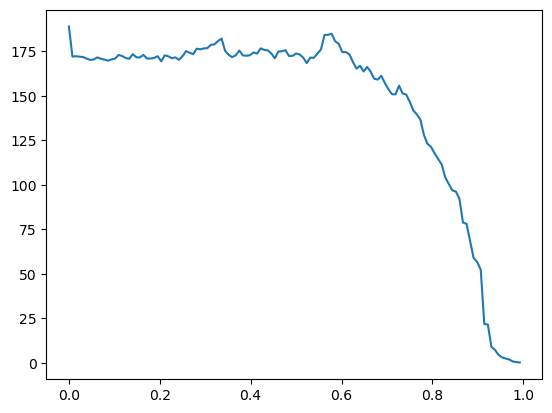

In [69]:
plt.plot(c_H, BM)

In [94]:
plt.figure()
figure = plt.plot(c_H, BM)
plt.xlabel("Hydrogen concentration")
plt.ylabel("Bulk modulus")
plt.savefig('BM.png')
plt.close()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Test potentials

In [2]:
pr = Project('potential_test')

In [7]:
Fe_bulk = pr.create.structure.bulk('Fe', crystalstructure='bcc', cubic= True)
Fe_sc = Fe_bulk.repeat([4,4,4])

job = pr.create_job(job_name='PT', job_type='Lammps', delete_existing_job=True)
job.structure = Fe_sc
# job.list_potentials()

In [9]:
list = job.list_potentials()

In [17]:
BM = []
N = []

for i in range(len(list)):
    j = pr.create.job.Lammps(f'optimize{i}', delete_existing_job=True)
    j.structure = Fe_sc
    j.potential = list[i]
    j.calc_minimize(n_print=10, pressure=0.0)
    j.run(delete_existing_job=True)
    opted_structure = j.get_final_structure()

    job = pr.create.job.Lammps(f'potentials{i}', delete_existing_job=True)
    job.structure = opted_structure
    job.potential = list[i]
    murn = job.create_job('Murnaghan', f"FeMurn{i}", delete_existing_job=True)
    murn.run(delete_existing_job=True)
    
    bm = murn.fit_birch_murnaghan()['bulkmodul_eq']
    BM.append(bm)
    N.append(i)

The job optimize0 was saved and received the ID: 7760


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn0 was saved and received the ID: 7761
The job FeMurn0_0_9 was saved and received the ID: 7762
The job FeMurn0_0_92 was saved and received the ID: 7763
The job FeMurn0_0_94 was saved and received the ID: 7764
The job FeMurn0_0_96 was saved and received the ID: 7765
The job FeMurn0_0_98 was saved and received the ID: 7766
The job FeMurn0_1_0 was saved and received the ID: 7767
The job FeMurn0_1_02 was saved and received the ID: 7768
The job FeMurn0_1_04 was saved and received the ID: 7769
The job FeMurn0_1_06 was saved and received the ID: 7770
The job FeMurn0_1_08 was saved and received the ID: 7771
The job FeMurn0_1_1 was saved and received the ID: 7772
The job optimize1 was saved and received the ID: 7773


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn1 was saved and received the ID: 7774
The job FeMurn1_0_9 was saved and received the ID: 7775
The job FeMurn1_0_92 was saved and received the ID: 7776
The job FeMurn1_0_94 was saved and received the ID: 7777
The job FeMurn1_0_96 was saved and received the ID: 7778
The job FeMurn1_0_98 was saved and received the ID: 7779
The job FeMurn1_1_0 was saved and received the ID: 7780
The job FeMurn1_1_02 was saved and received the ID: 7781
The job FeMurn1_1_04 was saved and received the ID: 7782
The job FeMurn1_1_06 was saved and received the ID: 7783
The job FeMurn1_1_08 was saved and received the ID: 7784
The job FeMurn1_1_1 was saved and received the ID: 7785
The job optimize2 was saved and received the ID: 7786


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn2 was saved and received the ID: 7787
The job FeMurn2_0_9 was saved and received the ID: 7788
The job FeMurn2_0_92 was saved and received the ID: 7789
The job FeMurn2_0_94 was saved and received the ID: 7790
The job FeMurn2_0_96 was saved and received the ID: 7791
The job FeMurn2_0_98 was saved and received the ID: 7792
The job FeMurn2_1_0 was saved and received the ID: 7793
The job FeMurn2_1_02 was saved and received the ID: 7794
The job FeMurn2_1_04 was saved and received the ID: 7795
The job FeMurn2_1_06 was saved and received the ID: 7796
The job FeMurn2_1_08 was saved and received the ID: 7797
The job FeMurn2_1_1 was saved and received the ID: 7798
The job optimize3 was saved and received the ID: 7799


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn3 was saved and received the ID: 7800
The job FeMurn3_0_9 was saved and received the ID: 7801
The job FeMurn3_0_92 was saved and received the ID: 7802
The job FeMurn3_0_94 was saved and received the ID: 7803
The job FeMurn3_0_96 was saved and received the ID: 7804
The job FeMurn3_0_98 was saved and received the ID: 7805
The job FeMurn3_1_0 was saved and received the ID: 7806
The job FeMurn3_1_02 was saved and received the ID: 7807
The job FeMurn3_1_04 was saved and received the ID: 7808
The job FeMurn3_1_06 was saved and received the ID: 7809
The job FeMurn3_1_08 was saved and received the ID: 7810
The job FeMurn3_1_1 was saved and received the ID: 7811
The job optimize4 was saved and received the ID: 7812


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn4 was saved and received the ID: 7813
The job FeMurn4_0_9 was saved and received the ID: 7814
The job FeMurn4_0_92 was saved and received the ID: 7815
The job FeMurn4_0_94 was saved and received the ID: 7816
The job FeMurn4_0_96 was saved and received the ID: 7817
The job FeMurn4_0_98 was saved and received the ID: 7818
The job FeMurn4_1_0 was saved and received the ID: 7819
The job FeMurn4_1_02 was saved and received the ID: 7820
The job FeMurn4_1_04 was saved and received the ID: 7821
The job FeMurn4_1_06 was saved and received the ID: 7822
The job FeMurn4_1_08 was saved and received the ID: 7823
The job FeMurn4_1_1 was saved and received the ID: 7824
The job optimize5 was saved and received the ID: 7825


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn5 was saved and received the ID: 7826
The job FeMurn5_0_9 was saved and received the ID: 7827
The job FeMurn5_0_92 was saved and received the ID: 7828
The job FeMurn5_0_94 was saved and received the ID: 7829
The job FeMurn5_0_96 was saved and received the ID: 7830
The job FeMurn5_0_98 was saved and received the ID: 7831
The job FeMurn5_1_0 was saved and received the ID: 7832
The job FeMurn5_1_02 was saved and received the ID: 7833
The job FeMurn5_1_04 was saved and received the ID: 7834
The job FeMurn5_1_06 was saved and received the ID: 7835
The job FeMurn5_1_08 was saved and received the ID: 7836
The job FeMurn5_1_1 was saved and received the ID: 7837
The job optimize6 was saved and received the ID: 7838


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn6 was saved and received the ID: 7839
The job FeMurn6_0_9 was saved and received the ID: 7840
The job FeMurn6_0_92 was saved and received the ID: 7841
The job FeMurn6_0_94 was saved and received the ID: 7842
The job FeMurn6_0_96 was saved and received the ID: 7843
The job FeMurn6_0_98 was saved and received the ID: 7844
The job FeMurn6_1_0 was saved and received the ID: 7845
The job FeMurn6_1_02 was saved and received the ID: 7846
The job FeMurn6_1_04 was saved and received the ID: 7847
The job FeMurn6_1_06 was saved and received the ID: 7848
The job FeMurn6_1_08 was saved and received the ID: 7849
The job FeMurn6_1_1 was saved and received the ID: 7850
The job optimize7 was saved and received the ID: 7851


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn7 was saved and received the ID: 7852
The job FeMurn7_0_9 was saved and received the ID: 7853
The job FeMurn7_0_92 was saved and received the ID: 7854
The job FeMurn7_0_94 was saved and received the ID: 7855
The job FeMurn7_0_96 was saved and received the ID: 7856
The job FeMurn7_0_98 was saved and received the ID: 7857
The job FeMurn7_1_0 was saved and received the ID: 7858
The job FeMurn7_1_02 was saved and received the ID: 7859
The job FeMurn7_1_04 was saved and received the ID: 7860
The job FeMurn7_1_06 was saved and received the ID: 7861
The job FeMurn7_1_08 was saved and received the ID: 7862
The job FeMurn7_1_1 was saved and received the ID: 7863
The job optimize8 was saved and received the ID: 7864


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn8 was saved and received the ID: 7865
The job FeMurn8_0_9 was saved and received the ID: 7866
The job FeMurn8_0_92 was saved and received the ID: 7867
The job FeMurn8_0_94 was saved and received the ID: 7868
The job FeMurn8_0_96 was saved and received the ID: 7869
The job FeMurn8_0_98 was saved and received the ID: 7870
The job FeMurn8_1_0 was saved and received the ID: 7871
The job FeMurn8_1_02 was saved and received the ID: 7872
The job FeMurn8_1_04 was saved and received the ID: 7873
The job FeMurn8_1_06 was saved and received the ID: 7874
The job FeMurn8_1_08 was saved and received the ID: 7875
The job FeMurn8_1_1 was saved and received the ID: 7876
The job optimize9 was saved and received the ID: 7877


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn9 was saved and received the ID: 7878
The job FeMurn9_0_9 was saved and received the ID: 7879
The job FeMurn9_0_92 was saved and received the ID: 7880
The job FeMurn9_0_94 was saved and received the ID: 7881
The job FeMurn9_0_96 was saved and received the ID: 7882
The job FeMurn9_0_98 was saved and received the ID: 7883
The job FeMurn9_1_0 was saved and received the ID: 7884
The job FeMurn9_1_02 was saved and received the ID: 7885
The job FeMurn9_1_04 was saved and received the ID: 7886
The job FeMurn9_1_06 was saved and received the ID: 7887
The job FeMurn9_1_08 was saved and received the ID: 7888
The job FeMurn9_1_1 was saved and received the ID: 7889
The job optimize10 was saved and received the ID: 7890


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn10 was saved and received the ID: 7891
The job FeMurn10_0_9 was saved and received the ID: 7892
The job FeMurn10_0_92 was saved and received the ID: 7893
The job FeMurn10_0_94 was saved and received the ID: 7894
The job FeMurn10_0_96 was saved and received the ID: 7895
The job FeMurn10_0_98 was saved and received the ID: 7896
The job FeMurn10_1_0 was saved and received the ID: 7897
The job FeMurn10_1_02 was saved and received the ID: 7898
The job FeMurn10_1_04 was saved and received the ID: 7899
The job FeMurn10_1_06 was saved and received the ID: 7900
The job FeMurn10_1_08 was saved and received the ID: 7901
The job FeMurn10_1_1 was saved and received the ID: 7902
The job optimize11 was saved and received the ID: 7903


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn11 was saved and received the ID: 7904
The job FeMurn11_0_9 was saved and received the ID: 7905
The job FeMurn11_0_92 was saved and received the ID: 7906
The job FeMurn11_0_94 was saved and received the ID: 7907
The job FeMurn11_0_96 was saved and received the ID: 7908
The job FeMurn11_0_98 was saved and received the ID: 7909
The job FeMurn11_1_0 was saved and received the ID: 7910
The job FeMurn11_1_02 was saved and received the ID: 7911
The job FeMurn11_1_04 was saved and received the ID: 7912
The job FeMurn11_1_06 was saved and received the ID: 7913
The job FeMurn11_1_08 was saved and received the ID: 7914
The job FeMurn11_1_1 was saved and received the ID: 7915
The job optimize12 was saved and received the ID: 7916


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn12 was saved and received the ID: 7917
The job FeMurn12_0_9 was saved and received the ID: 7918
The job FeMurn12_0_92 was saved and received the ID: 7919
The job FeMurn12_0_94 was saved and received the ID: 7920
The job FeMurn12_0_96 was saved and received the ID: 7921
The job FeMurn12_0_98 was saved and received the ID: 7922
The job FeMurn12_1_0 was saved and received the ID: 7923
The job FeMurn12_1_02 was saved and received the ID: 7924
The job FeMurn12_1_04 was saved and received the ID: 7925
The job FeMurn12_1_06 was saved and received the ID: 7926
The job FeMurn12_1_08 was saved and received the ID: 7927
The job FeMurn12_1_1 was saved and received the ID: 7928
The job optimize13 was saved and received the ID: 7929


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn13 was saved and received the ID: 7930
The job FeMurn13_0_9 was saved and received the ID: 7931
The job FeMurn13_0_92 was saved and received the ID: 7932
The job FeMurn13_0_94 was saved and received the ID: 7933
The job FeMurn13_0_96 was saved and received the ID: 7934
The job FeMurn13_0_98 was saved and received the ID: 7935
The job FeMurn13_1_0 was saved and received the ID: 7936
The job FeMurn13_1_02 was saved and received the ID: 7937
The job FeMurn13_1_04 was saved and received the ID: 7938
The job FeMurn13_1_06 was saved and received the ID: 7939
The job FeMurn13_1_08 was saved and received the ID: 7940
The job FeMurn13_1_1 was saved and received the ID: 7941
The job optimize14 was saved and received the ID: 7942


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn14 was saved and received the ID: 7943
The job FeMurn14_0_9 was saved and received the ID: 7944
The job FeMurn14_0_92 was saved and received the ID: 7945
The job FeMurn14_0_94 was saved and received the ID: 7946
The job FeMurn14_0_96 was saved and received the ID: 7947
The job FeMurn14_0_98 was saved and received the ID: 7948
The job FeMurn14_1_0 was saved and received the ID: 7949
The job FeMurn14_1_02 was saved and received the ID: 7950
The job FeMurn14_1_04 was saved and received the ID: 7951
The job FeMurn14_1_06 was saved and received the ID: 7952
The job FeMurn14_1_08 was saved and received the ID: 7953
The job FeMurn14_1_1 was saved and received the ID: 7954
The job optimize15 was saved and received the ID: 7955


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn15 was saved and received the ID: 7956
The job FeMurn15_0_9 was saved and received the ID: 7957
The job FeMurn15_0_92 was saved and received the ID: 7958
The job FeMurn15_0_94 was saved and received the ID: 7959
The job FeMurn15_0_96 was saved and received the ID: 7960
The job FeMurn15_0_98 was saved and received the ID: 7961
The job FeMurn15_1_0 was saved and received the ID: 7962
The job FeMurn15_1_02 was saved and received the ID: 7963
The job FeMurn15_1_04 was saved and received the ID: 7964
The job FeMurn15_1_06 was saved and received the ID: 7965
The job FeMurn15_1_08 was saved and received the ID: 7966
The job FeMurn15_1_1 was saved and received the ID: 7967
The job optimize16 was saved and received the ID: 7968


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn16 was saved and received the ID: 7969
The job FeMurn16_0_9 was saved and received the ID: 7970
The job FeMurn16_0_92 was saved and received the ID: 7971
The job FeMurn16_0_94 was saved and received the ID: 7972
The job FeMurn16_0_96 was saved and received the ID: 7973
The job FeMurn16_0_98 was saved and received the ID: 7974
The job FeMurn16_1_0 was saved and received the ID: 7975
The job FeMurn16_1_02 was saved and received the ID: 7976
The job FeMurn16_1_04 was saved and received the ID: 7977
The job FeMurn16_1_06 was saved and received the ID: 7978
The job FeMurn16_1_08 was saved and received the ID: 7979
The job FeMurn16_1_1 was saved and received the ID: 7980
The job optimize17 was saved and received the ID: 7981


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn17 was saved and received the ID: 7982
The job FeMurn17_0_9 was saved and received the ID: 7983
The job FeMurn17_0_92 was saved and received the ID: 7984
The job FeMurn17_0_94 was saved and received the ID: 7985
The job FeMurn17_0_96 was saved and received the ID: 7986
The job FeMurn17_0_98 was saved and received the ID: 7987
The job FeMurn17_1_0 was saved and received the ID: 7988
The job FeMurn17_1_02 was saved and received the ID: 7989
The job FeMurn17_1_04 was saved and received the ID: 7990
The job FeMurn17_1_06 was saved and received the ID: 7991
The job FeMurn17_1_08 was saved and received the ID: 7992
The job FeMurn17_1_1 was saved and received the ID: 7993
The job optimize18 was saved and received the ID: 7994


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn18 was saved and received the ID: 7995
The job FeMurn18_0_9 was saved and received the ID: 7996
The job FeMurn18_0_92 was saved and received the ID: 7997
The job FeMurn18_0_94 was saved and received the ID: 7998
The job FeMurn18_0_96 was saved and received the ID: 7999
The job FeMurn18_0_98 was saved and received the ID: 8000
The job FeMurn18_1_0 was saved and received the ID: 8001
The job FeMurn18_1_02 was saved and received the ID: 8002
The job FeMurn18_1_04 was saved and received the ID: 8003
The job FeMurn18_1_06 was saved and received the ID: 8004
The job FeMurn18_1_08 was saved and received the ID: 8005
The job FeMurn18_1_1 was saved and received the ID: 8006
The job optimize19 was saved and received the ID: 8007


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn19 was saved and received the ID: 8008
The job FeMurn19_0_9 was saved and received the ID: 8009
The job FeMurn19_0_92 was saved and received the ID: 8010
The job FeMurn19_0_94 was saved and received the ID: 8011
The job FeMurn19_0_96 was saved and received the ID: 8012
The job FeMurn19_0_98 was saved and received the ID: 8013
The job FeMurn19_1_0 was saved and received the ID: 8014
The job FeMurn19_1_02 was saved and received the ID: 8015
The job FeMurn19_1_04 was saved and received the ID: 8016
The job FeMurn19_1_06 was saved and received the ID: 8017
The job FeMurn19_1_08 was saved and received the ID: 8018
The job FeMurn19_1_1 was saved and received the ID: 8019
The job optimize20 was saved and received the ID: 8020


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn20 was saved and received the ID: 8021
The job FeMurn20_0_9 was saved and received the ID: 8022
The job FeMurn20_0_92 was saved and received the ID: 8023
The job FeMurn20_0_94 was saved and received the ID: 8024
The job FeMurn20_0_96 was saved and received the ID: 8025
The job FeMurn20_0_98 was saved and received the ID: 8026
The job FeMurn20_1_0 was saved and received the ID: 8027
The job FeMurn20_1_02 was saved and received the ID: 8028
The job FeMurn20_1_04 was saved and received the ID: 8029
The job FeMurn20_1_06 was saved and received the ID: 8030
The job FeMurn20_1_08 was saved and received the ID: 8031
The job FeMurn20_1_1 was saved and received the ID: 8032
The job optimize21 was saved and received the ID: 8033


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn21 was saved and received the ID: 8034
The job FeMurn21_0_9 was saved and received the ID: 8035
The job FeMurn21_0_92 was saved and received the ID: 8036
The job FeMurn21_0_94 was saved and received the ID: 8037
The job FeMurn21_0_96 was saved and received the ID: 8038
The job FeMurn21_0_98 was saved and received the ID: 8039
The job FeMurn21_1_0 was saved and received the ID: 8040
The job FeMurn21_1_02 was saved and received the ID: 8041
The job FeMurn21_1_04 was saved and received the ID: 8042
The job FeMurn21_1_06 was saved and received the ID: 8043
The job FeMurn21_1_08 was saved and received the ID: 8044
The job FeMurn21_1_1 was saved and received the ID: 8045
The job optimize22 was saved and received the ID: 8046


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn22 was saved and received the ID: 8047
The job FeMurn22_0_9 was saved and received the ID: 8048
The job FeMurn22_0_92 was saved and received the ID: 8049
The job FeMurn22_0_94 was saved and received the ID: 8050
The job FeMurn22_0_96 was saved and received the ID: 8051
The job FeMurn22_0_98 was saved and received the ID: 8052
The job FeMurn22_1_0 was saved and received the ID: 8053
The job FeMurn22_1_02 was saved and received the ID: 8054
The job FeMurn22_1_04 was saved and received the ID: 8055
The job FeMurn22_1_06 was saved and received the ID: 8056
The job FeMurn22_1_08 was saved and received the ID: 8057
The job FeMurn22_1_1 was saved and received the ID: 8058
The job optimize23 was saved and received the ID: 8059


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn23 was saved and received the ID: 8060
The job FeMurn23_0_9 was saved and received the ID: 8061
The job FeMurn23_0_92 was saved and received the ID: 8062
The job FeMurn23_0_94 was saved and received the ID: 8063
The job FeMurn23_0_96 was saved and received the ID: 8064
The job FeMurn23_0_98 was saved and received the ID: 8065
The job FeMurn23_1_0 was saved and received the ID: 8066
The job FeMurn23_1_02 was saved and received the ID: 8067
The job FeMurn23_1_04 was saved and received the ID: 8068
The job FeMurn23_1_06 was saved and received the ID: 8069
The job FeMurn23_1_08 was saved and received the ID: 8070
The job FeMurn23_1_1 was saved and received the ID: 8071
The job optimize24 was saved and received the ID: 8072


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn24 was saved and received the ID: 8073
The job FeMurn24_0_9 was saved and received the ID: 8074
The job FeMurn24_0_92 was saved and received the ID: 8075
The job FeMurn24_0_94 was saved and received the ID: 8076
The job FeMurn24_0_96 was saved and received the ID: 8077
The job FeMurn24_0_98 was saved and received the ID: 8078
The job FeMurn24_1_0 was saved and received the ID: 8079
The job FeMurn24_1_02 was saved and received the ID: 8080
The job FeMurn24_1_04 was saved and received the ID: 8081
The job FeMurn24_1_06 was saved and received the ID: 8082
The job FeMurn24_1_08 was saved and received the ID: 8083
The job FeMurn24_1_1 was saved and received the ID: 8084
The job optimize25 was saved and received the ID: 8085


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn25 was saved and received the ID: 8086
The job FeMurn25_0_9 was saved and received the ID: 8087
The job FeMurn25_0_92 was saved and received the ID: 8088
The job FeMurn25_0_94 was saved and received the ID: 8089
The job FeMurn25_0_96 was saved and received the ID: 8090
The job FeMurn25_0_98 was saved and received the ID: 8091
The job FeMurn25_1_0 was saved and received the ID: 8092
The job FeMurn25_1_02 was saved and received the ID: 8093
The job FeMurn25_1_04 was saved and received the ID: 8094
The job FeMurn25_1_06 was saved and received the ID: 8095
The job FeMurn25_1_08 was saved and received the ID: 8096
The job FeMurn25_1_1 was saved and received the ID: 8097
The job optimize26 was saved and received the ID: 8098


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn26 was saved and received the ID: 8099
The job FeMurn26_0_9 was saved and received the ID: 8100
The job FeMurn26_0_92 was saved and received the ID: 8101
The job FeMurn26_0_94 was saved and received the ID: 8102
The job FeMurn26_0_96 was saved and received the ID: 8103
The job FeMurn26_0_98 was saved and received the ID: 8104
The job FeMurn26_1_0 was saved and received the ID: 8105
The job FeMurn26_1_02 was saved and received the ID: 8106
The job FeMurn26_1_04 was saved and received the ID: 8107
The job FeMurn26_1_06 was saved and received the ID: 8108
The job FeMurn26_1_08 was saved and received the ID: 8109
The job FeMurn26_1_1 was saved and received the ID: 8110
The job optimize27 was saved and received the ID: 8111


/tmp/ipykernel_2298375/2313573055.py:10: DeprecationWarning: pyiron_atomistics.lammps.base.get_final_structure is deprecated: use get_structure() instead.
  opted_structure = j.get_final_structure()


The job FeMurn27 was saved and received the ID: 8112
The job FeMurn27_0_9 was saved and received the ID: 8113
The job FeMurn27_0_92 was saved and received the ID: 8114
The job FeMurn27_0_94 was saved and received the ID: 8115
The job FeMurn27_0_96 was saved and received the ID: 8116
The job FeMurn27_0_98 was saved and received the ID: 8117
The job FeMurn27_1_0 was saved and received the ID: 8118
The job FeMurn27_1_02 was saved and received the ID: 8119
The job FeMurn27_1_04 was saved and received the ID: 8120
The job FeMurn27_1_06 was saved and received the ID: 8121
The job FeMurn27_1_08 was saved and received the ID: 8122
The job FeMurn27_1_1 was saved and received the ID: 8123
The job optimize28 was saved and received the ID: 8124


2024-04-23 11:43:30,300 - pyiron_log - WARNING - Job aborted
2024-04-23 11:43:30,300 - pyiron_log - WARNING - LAMMPS (7 Feb 2024 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (0 0 0) to (11.48 11.48 11.48)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  128 atoms
  read_data CPU = 0.002 seconds
ERROR on proc 0: Not a valid floating-point number: 'Infinity' (src/MANYBODY/pair_eam_alloy.cpp:174)
Last command: pair_coeff * * eam/alloy FeCr_d.eam.alloy Fe Cr
--------------------------------------------------------------------------
MPI_ABORT was invoked on rank 0 in communicator MPI_COMM_WORLD
with errorcode 1.

NOTE: invoking MPI_ABORT causes Open MPI to kill all MPI processes.
You may or may not see output from other processes, depending on
exactly when Open MPI kills them.
--------------------------------------------------------------------------



RuntimeError: Job aborted

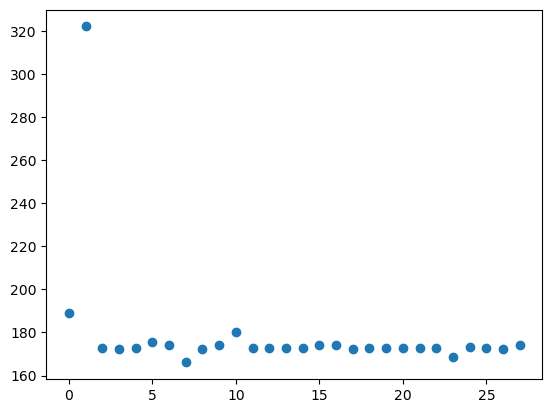

In [18]:
plt.scatter(N, BM)

In [19]:
BM

[188.9110326085164,
 322.25365633552576,
 172.75009599145034,
 172.4707066410101,
 173.0183964561872,
 175.69713227249144,
 173.98237252514932,
 166.0556266747708,
 172.4707066680587,
 173.98238867559684,
 180.17923689054888,
 172.76146264504067,
 172.75009596466808,
 172.75009596466808,
 172.75009596466808,
 173.98237252514932,
 173.9823867752704,
 172.4707066680587,
 172.76146274038814,
 173.01839644328447,
 173.01839644328447,
 172.7614627134257,
 172.75009596466808,
 168.79273130792026,
 173.0184368618566,
 172.76146282317984,
 172.4707066410101,
 174.1156964360702]

In [33]:
job_opt.list_potentials()

['1997--Ackland-G-J--Fe--LAMMPS--ipr1',
 '1998--Meyer-R--Fe--LAMMPS--ipr1',
 '2001--Lee-B-J--Fe--LAMMPS--ipr1',
 '2001--Lee-B-J--Fe-Cr--LAMMPS--ipr1',
 '2003--Mendelev-M-I--Fe-2--LAMMPS--ipr3',
 '2003--Mendelev-M-I--Fe-5--LAMMPS--ipr1',
 '2004--Ackland-G-J--Fe-P--LAMMPS--ipr1',
 '2004--Zhou-X-W--Fe--LAMMPS--ipr2',
 '2005--Lee-B-J--Fe-Cu--LAMMPS--ipr1',
 '2005--Mendelev-M-I--Al-Fe--LAMMPS--ipr1',
 '2006--Chamati-H--Fe--LAMMPS--ipr1',
 '2006--Kim-J--Fe-Pt--LAMMPS--ipr1',
 '2006--Lee-B-J--Fe-C--LAMMPS--ipr1',
 '2006--Lee-B-J--Fe-N--LAMMPS--ipr1',
 '2007--Lee-B-J--Fe-H--LAMMPS--ipr1',
 '2007--Mendelev-M-I--V-Fe--LAMMPS--ipr1',
 '2008--Hepburn-D-J--Fe-C--LAMMPS--ipr1',
 '2008--Sa-I--Fe-Nb--LAMMPS--ipr1',
 '2008--Sa-I--Fe-Ti--LAMMPS--ipr1',
 '2009--Bonny-G--Fe-Cu-Ni--LAMMPS--ipr1',
 '2009--Bonny-G--Fe-Ni--LAMMPS--ipr1',
 '2009--Kim-H-K--Fe-Ti-C--LAMMPS--ipr2',
 '2009--Kim-Y-M--Fe-Mn--LAMMPS--ipr1',
 '2009--Olsson-P-A-T--Fe--LAMMPS--ipr1',
 '2009--Stukowski-A--Fe-Cr--LAMMPS--ipr1',
 '2010--Ki

In [31]:
import ase.io

In [34]:
ase.io.write?

Signature:
ase.io.write(
    filename: Union[str, pathlib.PurePath, IO],
    images: Union[ase.atoms.Atoms, Sequence[ase.atoms.Atoms]],
    format: str = None,
    parallel: bool = True,
    append: bool = False,
    **kwargs: dict,
) -> None
Docstring:
Write Atoms object(s) to file.

filename: str or file
    Name of the file to write to or a file descriptor.  The name '-'
    means standard output.
images: Atoms object or list of Atoms objects
    A single Atoms object or a list of Atoms objects.
format: str
    Used to specify the file-format.  If not given, the
    file-format will be taken from suffix of the filename.
parallel: bool
    Default is to write on master only.  Use parallel=False to write
    from all slaves.
append: bool
    Default is to open files in 'w' or 'wb' mode, overwriting
    existing files.  In some cases opening the file in 'a' or 'ab'
    mode (appending) is useful,
    e.g. writing trajectories or saving multiple Atoms objects in one file.
    additional

In [35]:
ase.io.write(filename='Fe', images=Fe_p, format='cif')

In [36]:
Fe_final = job_opt.get_structure(-1)

In [37]:
Fe_final

Fe: [0. 0. 0.]
Fe: [1.43325 1.43325 1.43325]
tags: 
    indices: [0 0]
pbc: [ True  True  True]
cell: 
Cell([[2.866499999891875, 1.7552250248117367e-16, 1.7552250248117367e-16], [0.0, 2.866499999891875, 1.7552250248117362e-16], [0.0, 0.0, 2.866499999891875]])

In [39]:
import pyiron.atomistics.structure.atoms as pta

In [40]:
Fe_2 = pta.pyiron_to_ase(Fe_final)

In [41]:
Fe_2

Atoms(symbols='Fe2', pbc=True, cell=[[2.866499999891875, 1.7552250248117367e-16, 1.7552250248117367e-16], [0.0, 2.866499999891875, 1.7552250248117362e-16], [0.0, 0.0, 2.866499999891875]])

In [42]:
ase.io.write('Fe_2.cif', Fe_2)

In [47]:
Fe_2 = Fe_2.repeat([4,4,4])

In [48]:
from ase.visualize import view
view(Fe_2)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

In [51]:
ase.io.write('Fe_sc.cif', Fe_2)

In [50]:
Fe_2

Atoms(symbols='Fe128', pbc=True, cell=[[11.4659999995675, 7.020900099246947e-16, 7.020900099246947e-16], [0.0, 11.4659999995675, 7.020900099246945e-16], [0.0, 0.0, 11.4659999995675]])

In [ ]:
Fe

In [57]:
from ase.build import bulk
import ase.visualize

In [59]:
atoms = bulk('W', cubic=True)

In [60]:
ase.visualize.view(atoms)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>